In [278]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [279]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [280]:
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [281]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

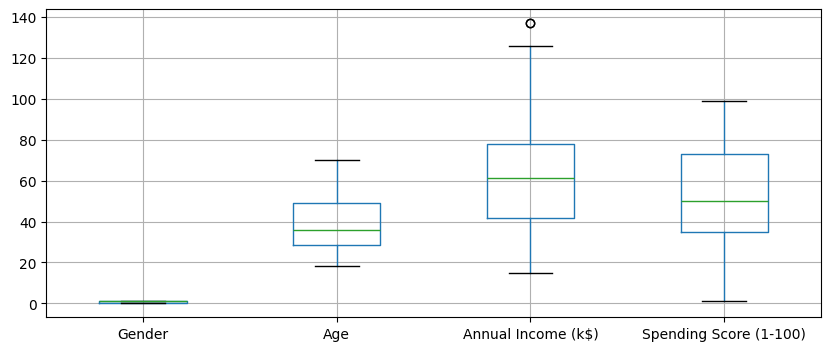

In [282]:
df.boxplot(figsize=(10,4))

In [283]:
threshold = 2.5
zscore = (df[['Annual Income (k$)']] - df[['Annual Income (k$)']].mean()) / df[['Annual Income (k$)']].std()
outliers = df[(np.abs(zscore) > threshold).any(axis=1)]
outliers.shape

(2, 4)

In [284]:
threshold = 2.5
df_clean = df.copy()
zscore = np.abs((df['Annual Income (k$)'] - df['Annual Income (k$)'].mean()) / df['Annual Income (k$)'].std())
df_clean = df_clean[zscore < threshold]
df_clean.shape

(198, 4)

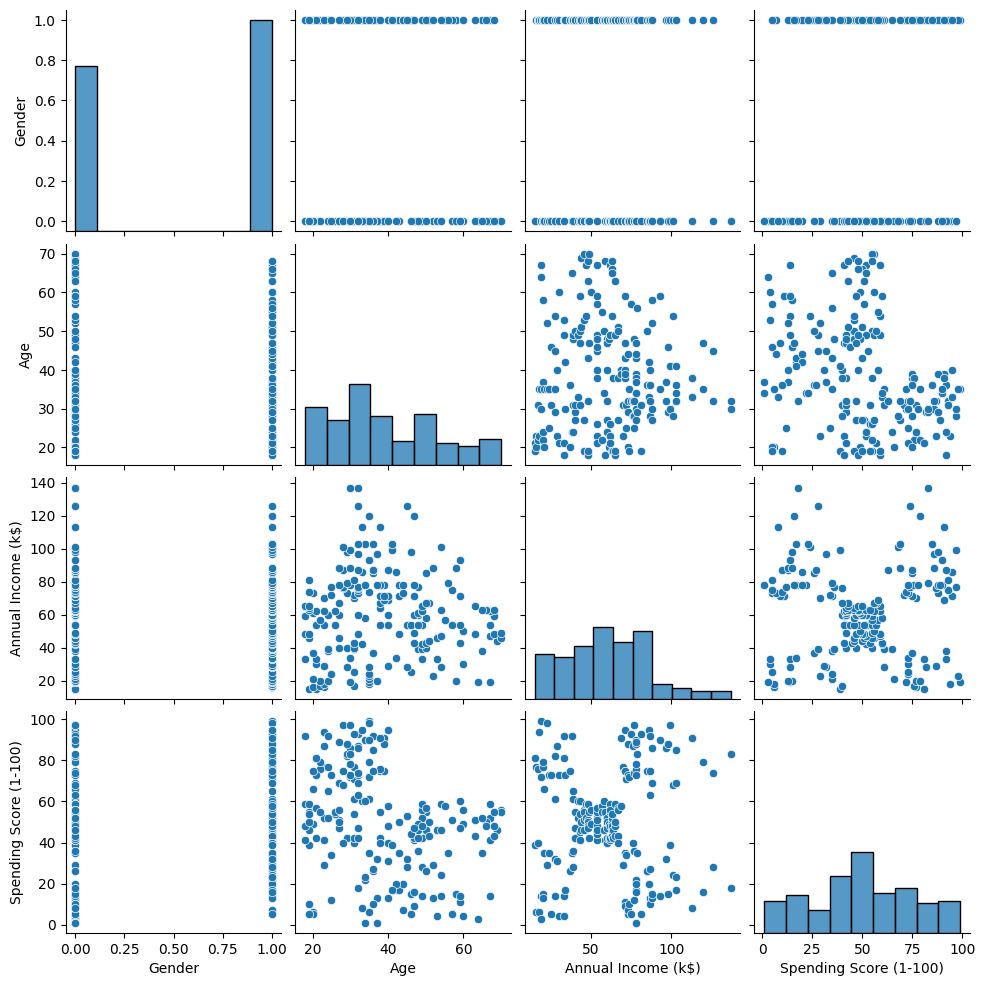

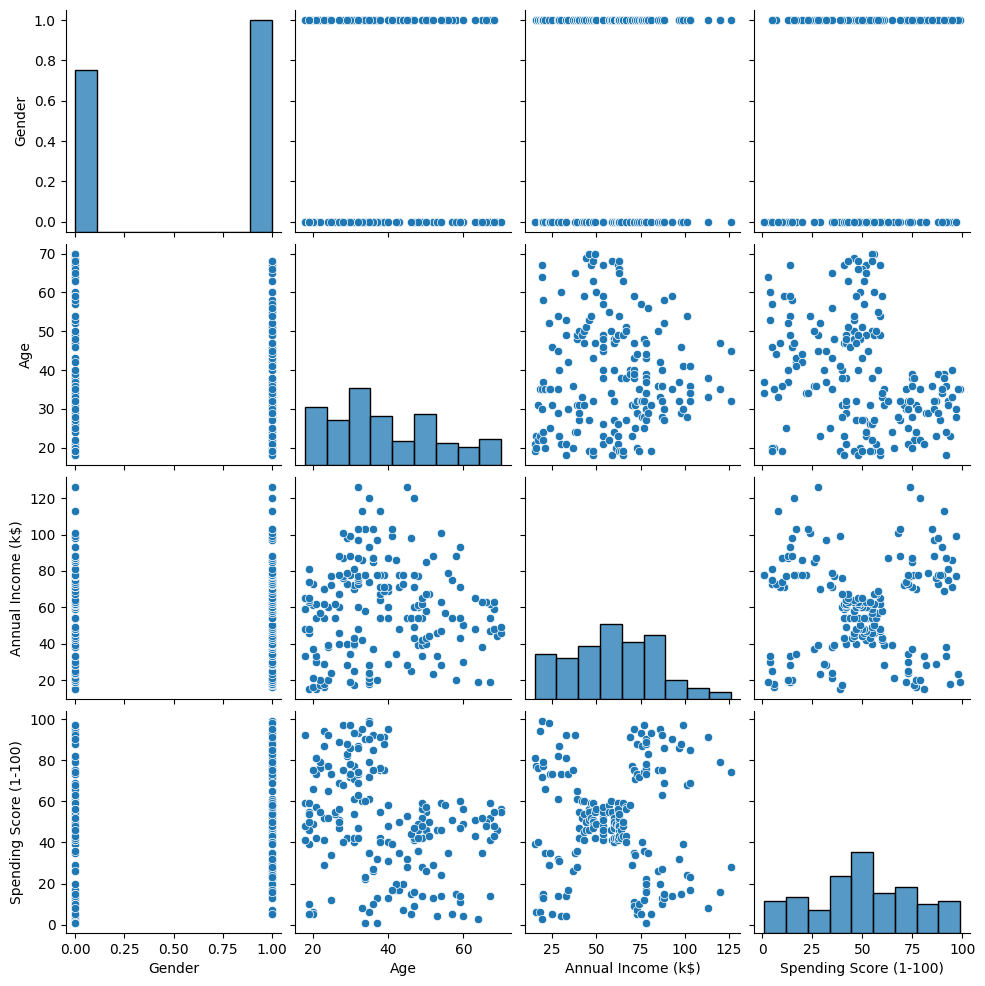

In [285]:
sns.pairplot(df)
sns.pairplot(df_clean)
plt.show()

In [286]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean.drop('Gender', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
df_scaled.insert(0, 'Gender', df_clean['Gender'])
df_scaled.head()

,Gender,Age,Annual Income,Spending Score
0,0,-1.425414,-1.779171,-0.435989
1,0,-1.282367,-1.779171,1.199413
2,1,-1.353890,-1.739447,-1.720949
3,1,-1.139319,-1.739447,1.043661
4,1,-0.567131,-1.699723,-0.397051


In [287]:
scores =[]
inertia = []
for k in range(2, 11):
    
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    label = model.predict(df_scaled)
    scores.append(silhouette_score(df_scaled, label))
    inertia.append(model.inertia_)

scores
inertia
print(np.c_[scores, inertia])

# scores =[]
# inertia = []
# for k in range(2, 11):
    
#     model = KMeans(n_clusters=k, init='random')
#     model.fit(df)
#     label = model.predict(df)
#     scores.append(silhouette_score(df, label))
#     inertia.append(model.inertia_)

# print(np.c_[scores, inertia])


[[3.02055908e-01 4.33779840e+02]
 [2.79644520e-01 3.48700958e+02]
 [3.52587858e-01 2.51120665e+02]
 [3.61614776e-01 2.12708928e+02]
 [3.62780062e-01 1.76232806e+02]
 [3.55594490e-01 1.64775393e+02]
 [3.19509898e-01 1.49698431e+02]
 [3.12547759e-01 1.36183624e+02]
 [3.25195046e-01 1.26608173e+02]]


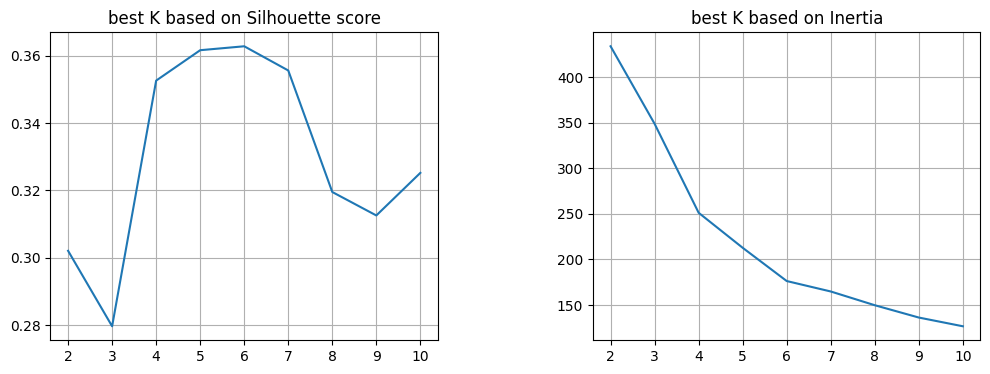

In [288]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('best K based on Silhouette score')
plt.plot(np.arange(2, 11), scores)
plt.grid()
plt.subplot(122)
plt.title('best K based on Inertia')
plt.plot(np.arange(2, 11), inertia)
plt.grid()
plt.subplots_adjust(wspace=0.4)

In [297]:
model = KMeans(n_clusters=5)
df["Cluster_ID"]  = model.fit_predict(df)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_ID
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,4
197,0,32,126,74,1
198,0,32,137,18,4


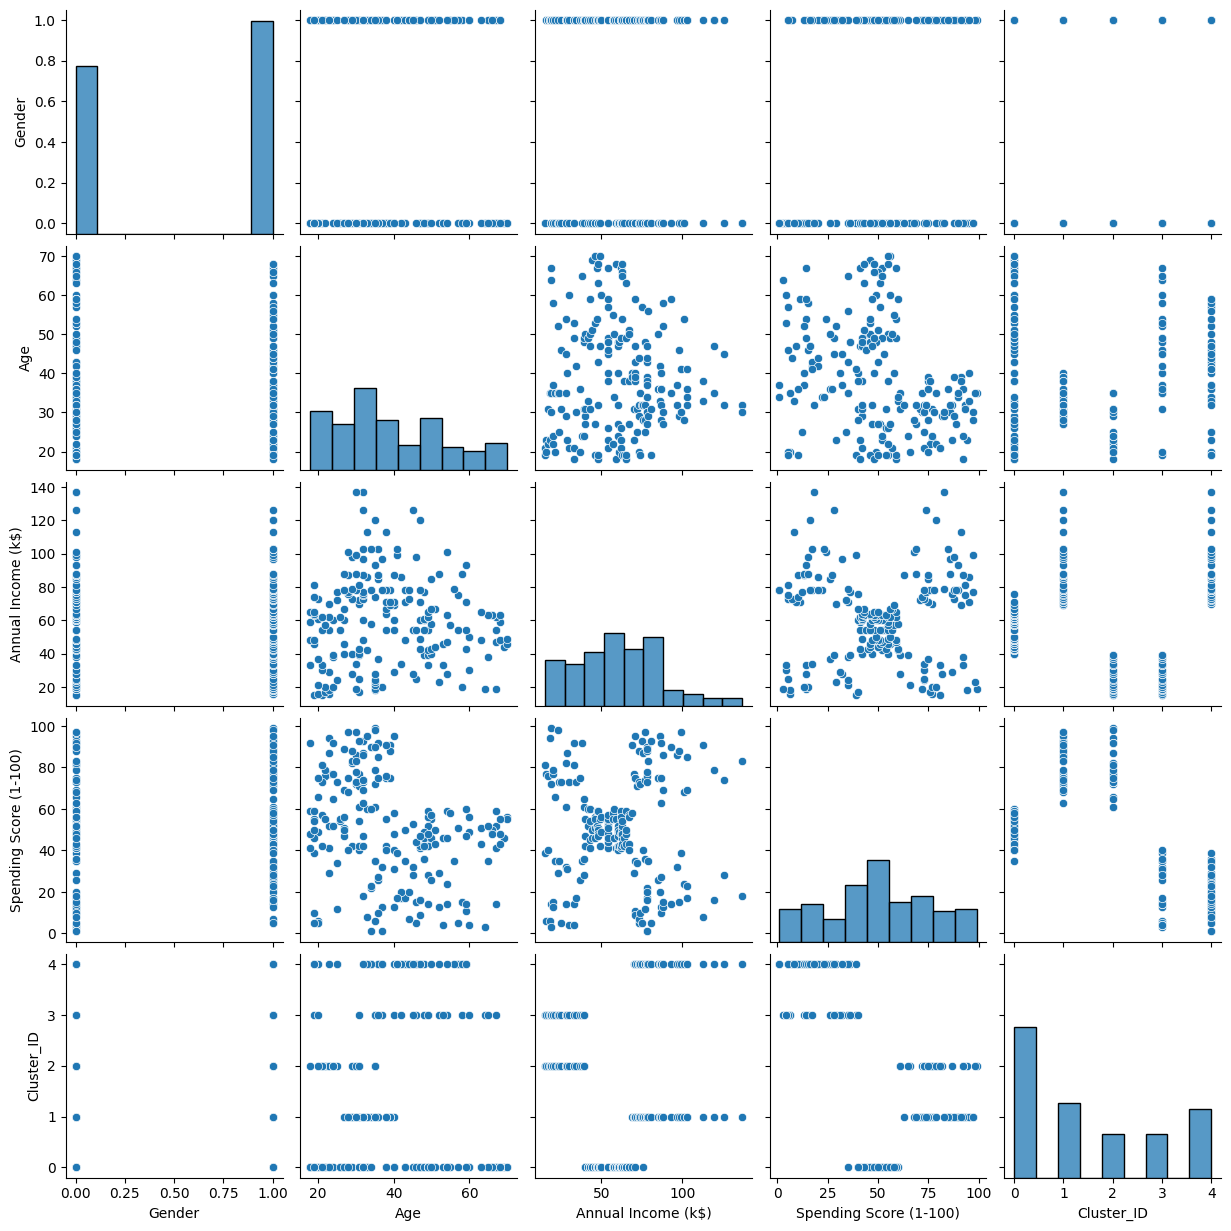

In [298]:
sns.pairplot(df)
plt.show()

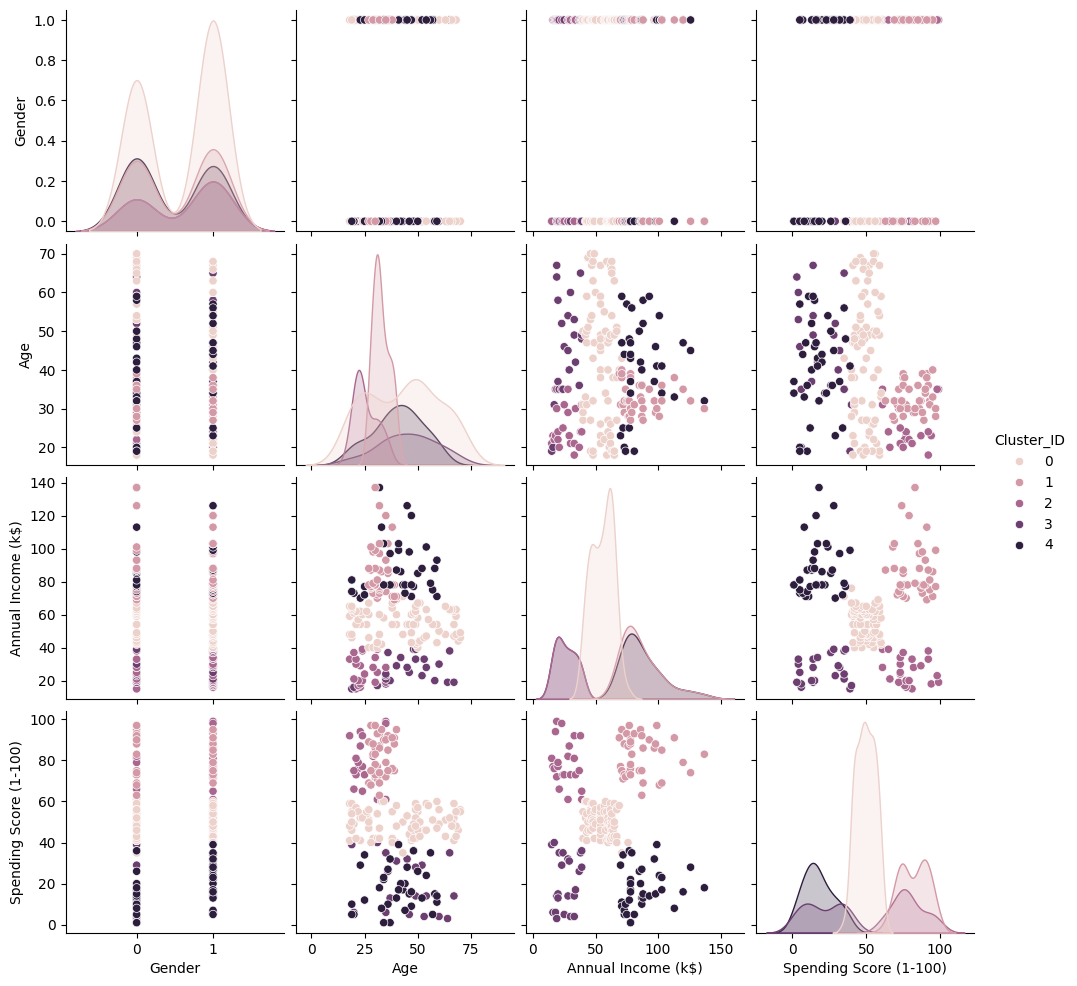

In [299]:
sns.pairplot(df, hue="Cluster_ID")
plt.show()